In [1]:
import pandas as pd
import numpy as np


# Exploratory

In [2]:
df_2019_Q1 = pd.read_csv('Divvy_Trips_2019_Q1.csv')
df_2019_Q1.head()

,trip_id,trip_id.1,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,day_of_week
0,0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,31.0,3
1,1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,30.0,3
2,2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,26.0,3
3,3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,1783.0,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,27.0,3
4,4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,26.0,3


In [3]:
df_2019_Q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365069 entries, 0 to 365068
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            365069 non-null  int64  
 1   trip_id.1          365069 non-null  int64  
 2   start_time         365069 non-null  object 
 3   end_time           365069 non-null  object 
 4   bikeid             365069 non-null  int64  
 5   tripduration       365069 non-null  float64
 6   from_station_id    365069 non-null  int64  
 7   from_station_name  365069 non-null  object 
 8   to_station_id      365069 non-null  int64  
 9   to_station_name    365069 non-null  object 
 10  usertype           365069 non-null  object 
 11  gender             365069 non-null  object 
 12  birthyear          365069 non-null  float64
 13  age                365069 non-null  float64
 14  day_of_week        365069 non-null  int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 41

In [4]:
df_2019_Q1.describe()

,trip_id,trip_id.1,bikeid,tripduration,from_station_id,to_station_id,birthyear,age,day_of_week
count,365069.000000,3.650690e+05,365069.000000,3.650690e+05,365069.000000,365069.000000,365069.000000,365069.000000,365069.000000
mean,182534.000000,2.196087e+07,3429.484607,1.016342e+03,198.088816,198.581123,1982.166864,37.833136,4.145460
std,105386.487049,1.271750e+05,1923.321025,2.791351e+04,153.493553,154.468304,11.180708,11.180708,1.769965
min,0.000000,2.174244e+07,1.000000,6.100000e+01,2.000000,2.000000,1900.000000,17.000000,1.000000
25%,91267.000000,2.184876e+07,1777.000000,3.260000e+02,76.000000,76.000000,1976.000000,29.000000,3.000000
50%,182534.000000,2.196183e+07,3489.000000,5.240000e+02,170.000000,168.000000,1985.000000,35.000000,4.000000
75%,273801.000000,2.207182e+07,5157.000000,8.660000e+02,287.000000,287.000000,1991.000000,44.000000,6.000000
max,365068.000000,2.217853e+07,6471.000000,1.062840e+07,665.000000,665.000000,2003.000000,120.000000,7.000000


In [5]:
#Count all null values
df_2019_Q1.isnull().sum()

trip_id              0
trip_id.1            0
start_time           0
end_time             0
bikeid               0
tripduration         0
from_station_id      0
from_station_name    0
to_station_id        0
to_station_name      0
usertype             0
gender               0
birthyear            0
age                  0
day_of_week          0
dtype: int64

In [6]:
#Count unique values
df_2019_Q1.nunique()

trip_id              365069
trip_id.1            365069
start_time           343022
end_time             338367
bikeid                 4769
tripduration           6666
from_station_id         594
from_station_name       594
to_station_id           600
to_station_name         600
usertype                  2
gender                    2
birthyear                73
age                      73
day_of_week               7
dtype: int64

# Cleaning process

## - Rename Columns & Convert Data Types

In [7]:
# Convert "Tripduration" to numeric
# Remove commas before converting to numeric
# df_2019_Q1["tripduration"] = pd.to_numeric(df_2019_Q1["tripduration"].str.replace(",", ""), errors="coerce")

df_2019_Q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365069 entries, 0 to 365068
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            365069 non-null  int64  
 1   trip_id.1          365069 non-null  int64  
 2   start_time         365069 non-null  object 
 3   end_time           365069 non-null  object 
 4   bikeid             365069 non-null  int64  
 5   tripduration       365069 non-null  float64
 6   from_station_id    365069 non-null  int64  
 7   from_station_name  365069 non-null  object 
 8   to_station_id      365069 non-null  int64  
 9   to_station_name    365069 non-null  object 
 10  usertype           365069 non-null  object 
 11  gender             365069 non-null  object 
 12  birthyear          365069 non-null  float64
 13  age                365069 non-null  float64
 14  day_of_week        365069 non-null  int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 41

In [8]:
df_2019_Q2= pd.read_csv('Divvy_Trips_2019_Q2.csv')
df_2019_Q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108163 entries, 0 to 1108162
Data columns (total 12 columns):
 #   Column                                            Non-Null Count    Dtype  
---  ------                                            --------------    -----  
 0   01 - Rental Details Rental ID                     1108163 non-null  int64  
 1   01 - Rental Details Local Start Time              1108163 non-null  object 
 2   01 - Rental Details Local End Time                1108163 non-null  object 
 3   01 - Rental Details Bike ID                       1108163 non-null  int64  
 4   01 - Rental Details Duration In Seconds Uncapped  1108163 non-null  object 
 5   03 - Rental Start Station ID                      1108163 non-null  int64  
 6   03 - Rental Start Station Name                    1108163 non-null  object 
 7   02 - Rental End Station ID                        1108163 non-null  int64  
 8   02 - Rental End Station Name                      1108163 non-null  obje

In [9]:
# Rename columns to match the others'column names

df_2019_Q2.rename(columns={"01 - Rental Details Rental ID":"trip_id"},inplace=True)
df_2019_Q2.rename(columns={"01 - Rental Details Local Start Time":"start_time"},inplace=True)
df_2019_Q2.rename(columns={"01 - Rental Details Local End Time":"end_time"},inplace=True)
df_2019_Q2.rename(columns={"01 - Rental Details Bike ID":"bikeid"},inplace=True)
df_2019_Q2.rename(columns={"01 - Rental Details Duration In Seconds Uncapped":"tripduration"},inplace=True)
df_2019_Q2.rename(columns={"03 - Rental Start Station ID":"from_station_id"},inplace=True)
df_2019_Q2.rename(columns={"03 - Rental Start Station Name":"from_station_name"},inplace=True)
df_2019_Q2.rename(columns={"02 - Rental End Station ID":"to_station_id"},inplace=True)
df_2019_Q2.rename(columns={"02 - Rental End Station Name":"to_station_name"},inplace=True)
df_2019_Q2.rename(columns={"User Type":"usertype"},inplace=True)
df_2019_Q2.rename(columns={"Member Gender":"gender"},inplace=True)
df_2019_Q2.rename(columns={"05 - Member Details Member Birthday Year":"birthyear"},inplace=True)


In [10]:
# Convert "Tripduration" to numeric
# Remove commas before converting to numeric
df_2019_Q2["tripduration"] = pd.to_numeric(df_2019_Q2["tripduration"].str.replace(",", ""), errors="coerce")

In [11]:
df_2019_Q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108163 entries, 0 to 1108162
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   trip_id            1108163 non-null  int64  
 1   start_time         1108163 non-null  object 
 2   end_time           1108163 non-null  object 
 3   bikeid             1108163 non-null  int64  
 4   tripduration       1108163 non-null  float64
 5   from_station_id    1108163 non-null  int64  
 6   from_station_name  1108163 non-null  object 
 7   to_station_id      1108163 non-null  int64  
 8   to_station_name    1108163 non-null  object 
 9   usertype           1108163 non-null  object 
 10  gender             922609 non-null   object 
 11  birthyear          927210 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 101.5+ MB


In [12]:
df_2019_Q3= pd.read_csv('Divvy_Trips_2019_Q3.csv')

df_2019_Q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640718 entries, 0 to 1640717
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   trip_id            1640718 non-null  int64  
 1   start_time         1640718 non-null  object 
 2   end_time           1640718 non-null  object 
 3   bikeid             1640718 non-null  int64  
 4   tripduration       1640718 non-null  object 
 5   from_station_id    1640718 non-null  int64  
 6   from_station_name  1640718 non-null  object 
 7   to_station_id      1640718 non-null  int64  
 8   to_station_name    1640718 non-null  object 
 9   usertype           1640718 non-null  object 
 10  gender             1353368 non-null  object 
 11  birthyear          1362624 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 150.2+ MB


In [13]:
# Convert "Tripduration" to numeric
# Remove commas before converting to numeric
df_2019_Q3["tripduration"] = pd.to_numeric(df_2019_Q3["tripduration"].str.replace(",", ""), errors="coerce") 

df_2019_Q3

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,1214.0,117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,1048.0,381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,1554.0,313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,1503.0,313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,1213.0,168,Michigan Ave & 14th St,62,McCormick Place,Customer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1640713,25223635,2019-09-30 23:56:27,2019-10-01 00:06:20,5690,593.0,84,Milwaukee Ave & Grand Ave,134,Peoria St & Jackson Blvd,Subscriber,Male,1993.0
1640714,25223636,2019-09-30 23:57:02,2019-10-01 00:02:13,5079,310.0,268,Lake Shore Dr & North Blvd,85,Michigan Ave & Oak St,Subscriber,Male,1992.0
1640715,25223637,2019-09-30 23:57:45,2019-10-01 00:01:41,5535,235.0,423,University Ave & 57th St,426,Ellis Ave & 60th St,Customer,Male,2000.0
1640716,25223638,2019-09-30 23:57:47,2019-10-01 00:04:41,6120,414.0,110,Dearborn St & Erie St,31,Franklin St & Chicago Ave (Temp),Subscriber,Male,1986.0


In [14]:
df_2019_Q4= pd.read_csv('Divvy_Trips_2019_Q4.csv')

df_2019_Q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704054 entries, 0 to 704053
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            704054 non-null  int64  
 1   start_time         704054 non-null  object 
 2   end_time           704054 non-null  object 
 3   bikeid             704054 non-null  int64  
 4   tripduration       704054 non-null  object 
 5   from_station_id    704054 non-null  int64  
 6   from_station_name  704054 non-null  object 
 7   to_station_id      704054 non-null  int64  
 8   to_station_name    704054 non-null  object 
 9   usertype           704054 non-null  object 
 10  gender             637463 non-null  object 
 11  birthyear          642373 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 64.5+ MB


In [15]:
# Convert "Tripduration" to numeric
# Remove commas before converting to numeric
df_2019_Q4["tripduration"] = pd.to_numeric(df_2019_Q4["tripduration"].str.replace(",", ""), errors="coerce")

df_2019_Q4

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940.0,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987.0
1,25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258.0,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998.0
2,25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850.0,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991.0
3,25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,2350.0,313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990.0
4,25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,1867.0,210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987.0
...,...,...,...,...,...,...,...,...,...,...,...,...
704049,25962900,2019-12-31 23:56:13,2020-01-01 00:15:45,2196,1172.0,112,Green St & Randolph St,225,Halsted St & Dickens Ave,Subscriber,Male,1981.0
704050,25962901,2019-12-31 23:56:34,2020-01-01 00:22:08,4877,1533.0,90,Millennium Park,90,Millennium Park,Subscriber,Male,1992.0
704051,25962902,2019-12-31 23:57:05,2020-01-01 00:05:46,863,520.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Male,1967.0
704052,25962903,2019-12-31 23:57:11,2020-01-01 00:05:45,2637,514.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Female,1970.0


### Filling missing values in "gender" by calculating proportion of male and female then filling in accordingly 

#### df_2019_Q1


In [16]:
# Calculate proportions

gender_counts = df_2019_Q1["gender"].value_counts()
total_counts =gender_counts.sum()

male_ratio=gender_counts.get("Male")/total_counts
female_ratio=gender_counts.get("Female")/total_counts

In [17]:
# Generate random genders based on the ratios
num_missing = df_2019_Q1["gender"].isna().sum()
random_genders = np.random.choice(["Male","Female"],size = num_missing, p = [male_ratio,female_ratio])

df_2019_Q1.loc[df_2019_Q1["gender"].isna(),"gender"] = random_genders

In [18]:
df_2019_Q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365069 entries, 0 to 365068
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            365069 non-null  int64  
 1   trip_id.1          365069 non-null  int64  
 2   start_time         365069 non-null  object 
 3   end_time           365069 non-null  object 
 4   bikeid             365069 non-null  int64  
 5   tripduration       365069 non-null  float64
 6   from_station_id    365069 non-null  int64  
 7   from_station_name  365069 non-null  object 
 8   to_station_id      365069 non-null  int64  
 9   to_station_name    365069 non-null  object 
 10  usertype           365069 non-null  object 
 11  gender             365069 non-null  object 
 12  birthyear          365069 non-null  float64
 13  age                365069 non-null  float64
 14  day_of_week        365069 non-null  int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 41

#### df_2019_Q2

In [19]:
# Calculate proportions

gender_counts = df_2019_Q2["gender"].value_counts()
total_counts =gender_counts.sum()

male_ratio=gender_counts.get("Male")/total_counts
female_ratio=gender_counts.get("Female")/total_counts

In [20]:
# Generate random genders based on the ratios
num_missing = df_2019_Q2["gender"].isna().sum()
random_genders = np.random.choice(["Male","Female"],size = num_missing, p = [male_ratio,female_ratio])

df_2019_Q2.loc[df_2019_Q2["gender"].isna(),"gender"] = random_genders

In [21]:
df_2019_Q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108163 entries, 0 to 1108162
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   trip_id            1108163 non-null  int64  
 1   start_time         1108163 non-null  object 
 2   end_time           1108163 non-null  object 
 3   bikeid             1108163 non-null  int64  
 4   tripduration       1108163 non-null  float64
 5   from_station_id    1108163 non-null  int64  
 6   from_station_name  1108163 non-null  object 
 7   to_station_id      1108163 non-null  int64  
 8   to_station_name    1108163 non-null  object 
 9   usertype           1108163 non-null  object 
 10  gender             1108163 non-null  object 
 11  birthyear          927210 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 101.5+ MB


#### df_2019_Q3

In [22]:
# Calculate proportions

gender_counts = df_2019_Q3["gender"].value_counts()
total_counts =gender_counts.sum()

male_ratio=gender_counts.get("Male")/total_counts
female_ratio=gender_counts.get("Female")/total_counts

In [23]:
# Generate random genders based on the ratios
num_missing = df_2019_Q3["gender"].isna().sum()
random_genders = np.random.choice(["Male","Female"],size = num_missing, p = [male_ratio,female_ratio])

df_2019_Q3.loc[df_2019_Q3["gender"].isna(),"gender"] = random_genders

In [24]:
df_2019_Q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640718 entries, 0 to 1640717
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   trip_id            1640718 non-null  int64  
 1   start_time         1640718 non-null  object 
 2   end_time           1640718 non-null  object 
 3   bikeid             1640718 non-null  int64  
 4   tripduration       1640718 non-null  float64
 5   from_station_id    1640718 non-null  int64  
 6   from_station_name  1640718 non-null  object 
 7   to_station_id      1640718 non-null  int64  
 8   to_station_name    1640718 non-null  object 
 9   usertype           1640718 non-null  object 
 10  gender             1640718 non-null  object 
 11  birthyear          1362624 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 150.2+ MB


#### df_2019_Q4

In [25]:
# Calculate proportions

gender_counts = df_2019_Q4["gender"].value_counts()
total_counts =gender_counts.sum()

male_ratio=gender_counts.get("Male")/total_counts
female_ratio=gender_counts.get("Female")/total_counts

In [26]:
# Generate random genders based on the ratios
num_missing = df_2019_Q4["gender"].isna().sum()
random_genders = np.random.choice(["Male","Female"],size = num_missing, p = [male_ratio,female_ratio])

df_2019_Q4.loc[df_2019_Q4["gender"].isna(),"gender"] = random_genders

In [27]:
df_2019_Q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704054 entries, 0 to 704053
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            704054 non-null  int64  
 1   start_time         704054 non-null  object 
 2   end_time           704054 non-null  object 
 3   bikeid             704054 non-null  int64  
 4   tripduration       704054 non-null  float64
 5   from_station_id    704054 non-null  int64  
 6   from_station_name  704054 non-null  object 
 7   to_station_id      704054 non-null  int64  
 8   to_station_name    704054 non-null  object 
 9   usertype           704054 non-null  object 
 10  gender             704054 non-null  object 
 11  birthyear          642373 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 64.5+ MB


## - Filled missing values in birthyear using the median based on usertype and quarter of the year
## - Added an age column by subtracting birth year from 2019
## - Created a weekday column to indicate the day of the week for each trip.

In [28]:
# Assuming dataset is from 2020
current_year = 2020

### df_2019_Q1

In [29]:
median_subcriber = df_2019_Q1.loc[df_2019_Q1["usertype"] == "Subscriber", "birthyear"].median()
median_customer = df_2019_Q1.loc[df_2019_Q1["usertype"] == "Customer", "birthyear"].median()
print(median_subcriber)
print(median_customer)

df_2019_Q1.loc[(df_2019_Q1["usertype"] == "Subscriber") & (df_2019_Q1["birthyear"].isna()), "birthyear"] = median_subcriber
df_2019_Q1.loc[(df_2019_Q1["usertype"] == "Customer") & (df_2019_Q1["birthyear"].isna()), "birthyear"] = median_customer


1985.0
1992.0


In [30]:
# Calculate age
df_2019_Q1["age"] = current_year - df_2019_Q1["birthyear"]

In [31]:
# Add column day_of_week  (1=sunday, 7=saturday)
df_2019_Q1["start_time"] = pd.to_datetime(df_2019_Q1["start_time"])
df_2019_Q1["day_of_week"] = df_2019_Q1["start_time"].dt.weekday + 2  
df_2019_Q1["day_of_week"] = df_2019_Q1["day_of_week"].replace({8: 1})

In [32]:
df_2019_Q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365069 entries, 0 to 365068
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            365069 non-null  int64         
 1   trip_id.1          365069 non-null  int64         
 2   start_time         365069 non-null  datetime64[ns]
 3   end_time           365069 non-null  object        
 4   bikeid             365069 non-null  int64         
 5   tripduration       365069 non-null  float64       
 6   from_station_id    365069 non-null  int64         
 7   from_station_name  365069 non-null  object        
 8   to_station_id      365069 non-null  int64         
 9   to_station_name    365069 non-null  object        
 10  usertype           365069 non-null  object        
 11  gender             365069 non-null  object        
 12  birthyear          365069 non-null  float64       
 13  age                365069 non-null  float64 

### df_2019_Q2

In [33]:
median_subcriber = df_2019_Q2.loc[df_2019_Q2["usertype"] == "Subscriber", "birthyear"].median()
median_customer = df_2019_Q2.loc[df_2019_Q2["usertype"] == "Customer", "birthyear"].median()
print(median_subcriber)
print(median_customer)

df_2019_Q2.loc[(df_2019_Q2["usertype"] == "Subscriber") & (df_2019_Q2["birthyear"].isna()), "birthyear"] = median_subcriber
df_2019_Q2.loc[(df_2019_Q2["usertype"] == "Customer") & (df_2019_Q2["birthyear"].isna()), "birthyear"] = median_customer


1987.0
1991.0


In [34]:
# Calculate age
df_2019_Q2["age"] = current_year - df_2019_Q2["birthyear"]

In [35]:
# Add column day_of_week  (1=sunday, 7=saturday)
df_2019_Q2["start_time"] = pd.to_datetime(df_2019_Q2["start_time"])
df_2019_Q2["day_of_week"] = df_2019_Q2["start_time"].dt.weekday + 2  
df_2019_Q2["day_of_week"] = df_2019_Q2["day_of_week"].replace({8: 1})

In [36]:
df_2019_Q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108163 entries, 0 to 1108162
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   trip_id            1108163 non-null  int64         
 1   start_time         1108163 non-null  datetime64[ns]
 2   end_time           1108163 non-null  object        
 3   bikeid             1108163 non-null  int64         
 4   tripduration       1108163 non-null  float64       
 5   from_station_id    1108163 non-null  int64         
 6   from_station_name  1108163 non-null  object        
 7   to_station_id      1108163 non-null  int64         
 8   to_station_name    1108163 non-null  object        
 9   usertype           1108163 non-null  object        
 10  gender             1108163 non-null  object        
 11  birthyear          1108163 non-null  float64       
 12  age                1108163 non-null  float64       
 13  day_of_week        1108163 

### df_2019_Q3

In [37]:
median_subcriber = df_2019_Q3.loc[df_2019_Q3["usertype"] == "Subscriber", "birthyear"].median()
median_customer = df_2019_Q3.loc[df_2019_Q3["usertype"] == "Customer", "birthyear"].median()
print(median_subcriber)
print(median_customer)

df_2019_Q3.loc[(df_2019_Q3["usertype"] == "Subscriber") & (df_2019_Q3["birthyear"].isna()), "birthyear"] = median_subcriber
df_2019_Q3.loc[(df_2019_Q3["usertype"] == "Customer") & (df_2019_Q3["birthyear"].isna()), "birthyear"] = median_customer


1988.0
1991.0


In [38]:
# Calculate age
df_2019_Q3["age"] = current_year - df_2019_Q3["birthyear"]

In [39]:
# Add column day_of_week  (1=sunday, 7=saturday)
df_2019_Q3["start_time"] = pd.to_datetime(df_2019_Q3["start_time"])
df_2019_Q3["day_of_week"] = df_2019_Q3["start_time"].dt.weekday + 2  
df_2019_Q3["day_of_week"] = df_2019_Q3["day_of_week"].replace({8: 1})

In [40]:
df_2019_Q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640718 entries, 0 to 1640717
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   trip_id            1640718 non-null  int64         
 1   start_time         1640718 non-null  datetime64[ns]
 2   end_time           1640718 non-null  object        
 3   bikeid             1640718 non-null  int64         
 4   tripduration       1640718 non-null  float64       
 5   from_station_id    1640718 non-null  int64         
 6   from_station_name  1640718 non-null  object        
 7   to_station_id      1640718 non-null  int64         
 8   to_station_name    1640718 non-null  object        
 9   usertype           1640718 non-null  object        
 10  gender             1640718 non-null  object        
 11  birthyear          1640718 non-null  float64       
 12  age                1640718 non-null  float64       
 13  day_of_week        1640718 

### df_2019_Q4

In [41]:
median_subcriber = df_2019_Q4.loc[df_2019_Q4["usertype"] == "Subscriber", "birthyear"].median()
median_customer = df_2019_Q4.loc[df_2019_Q4["usertype"] == "Customer", "birthyear"].median()
print(median_subcriber)
print(median_customer)

df_2019_Q4.loc[(df_2019_Q4["usertype"] == "Subscriber") & (df_2019_Q4["birthyear"].isna()), "birthyear"] = median_subcriber
df_2019_Q4.loc[(df_2019_Q4["usertype"] == "Customer") & (df_2019_Q4["birthyear"].isna()), "birthyear"] = median_customer


1987.0
1991.0


In [42]:
# Calculate age
df_2019_Q4["age"] = current_year - df_2019_Q4["birthyear"]

In [43]:
# Add column day_of_week  (1=sunday, 7=saturday)
df_2019_Q4["start_time"] = pd.to_datetime(df_2019_Q4["start_time"])
df_2019_Q4["day_of_week"] = df_2019_Q4["start_time"].dt.weekday + 2  
df_2019_Q4["day_of_week"] = df_2019_Q4["day_of_week"].replace({8: 1})

In [44]:
df_2019_Q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704054 entries, 0 to 704053
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            704054 non-null  int64         
 1   start_time         704054 non-null  datetime64[ns]
 2   end_time           704054 non-null  object        
 3   bikeid             704054 non-null  int64         
 4   tripduration       704054 non-null  float64       
 5   from_station_id    704054 non-null  int64         
 6   from_station_name  704054 non-null  object        
 7   to_station_id      704054 non-null  int64         
 8   to_station_name    704054 non-null  object        
 9   usertype           704054 non-null  object        
 10  gender             704054 non-null  object        
 11  birthyear          704054 non-null  float64       
 12  age                704054 non-null  float64       
 13  day_of_week        704054 non-null  int32   

## - Merging data (stacking vertically)

In [45]:
df_combined = pd.concat([df_2019_Q1,df_2019_Q2,df_2019_Q3,df_2019_Q4], ignore_index=True)
df_combined

,trip_id,trip_id.1,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,day_of_week
0,0,21742443.0,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,31.0,3
1,1,21742444.0,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,30.0,3
2,2,21742445.0,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,26.0,3
3,3,21742446.0,2019-01-01 00:13:45,2019-01-01 00:43:28,252,1783.0,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,27.0,3
4,4,21742447.0,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,26.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3817999,25962900,NaN,2019-12-31 23:56:13,2020-01-01 00:15:45,2196,1172.0,112,Green St & Randolph St,225,Halsted St & Dickens Ave,Subscriber,Male,1981.0,39.0,3
3818000,25962901,NaN,2019-12-31 23:56:34,2020-01-01 00:22:08,4877,1533.0,90,Millennium Park,90,Millennium Park,Subscriber,Male,1992.0,28.0,3
3818001,25962902,NaN,2019-12-31 23:57:05,2020-01-01 00:05:46,863,520.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Male,1967.0,53.0,3
3818002,25962903,NaN,2019-12-31 23:57:11,2020-01-01 00:05:45,2637,514.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Female,1970.0,50.0,3


In [46]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818004 entries, 0 to 3818003
Data columns (total 15 columns):
 #   Column             Dtype         
---  ------             -----         
 0   trip_id            int64         
 1   trip_id.1          float64       
 2   start_time         datetime64[ns]
 3   end_time           object        
 4   bikeid             int64         
 5   tripduration       float64       
 6   from_station_id    int64         
 7   from_station_name  object        
 8   to_station_id      int64         
 9   to_station_name    object        
 10  usertype           object        
 11  gender             object        
 12  birthyear          float64       
 13  age                float64       
 14  day_of_week        int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(4), object(5)
memory usage: 422.4+ MB


In [47]:
len(df_combined)

3818004

In [49]:
# Count unique values
df_combined.nunique()

trip_id              3818004
trip_id.1             365069
start_time           3306090
end_time             3238342
bikeid                  6017
tripduration           21542
from_station_id          616
from_station_name        640
to_station_id            617
to_station_name          641
usertype                   2
gender                     2
birthyear                 94
age                       94
day_of_week                7
dtype: int64

In [50]:
# Count duplicated
df_combined.duplicated().sum()

0

In [51]:
df_combined.isnull().sum()

trip_id                    0
trip_id.1            3452935
start_time                 0
end_time                   0
bikeid                     0
tripduration               0
from_station_id            0
from_station_name          0
to_station_id              0
to_station_name            0
usertype                   0
gender                     0
birthyear                  0
age                        0
day_of_week                0
dtype: int64

In [52]:
df_combined.describe()

,trip_id,trip_id.1,start_time,bikeid,tripduration,from_station_id,to_station_id,birthyear,age,day_of_week
count,3.818004e+06,3.650690e+05,3818004,3.818004e+06,3.818004e+06,3.818004e+06,3.818004e+06,3.818004e+06,3.818004e+06,3.818004e+06
mean,2.183323e+07,2.196087e+07,2019-07-19 21:47:37.115991040,3.380252e+03,1.450203e+03,2.016659e+02,2.026363e+02,1.985050e+03,3.495016e+01,4.064086e+00
min,0.000000e+00,2.174244e+07,2019-01-01 00:04:37,1.000000e+00,6.100000e+01,1.000000e+00,1.000000e+00,1.759000e+03,6.000000e+00,1.000000e+00
25%,2.287379e+07,2.184876e+07,2019-05-29 15:49:26.500000,1.727000e+03,4.110000e+02,7.700000e+01,7.700000e+01,1.981000e+03,2.900000e+01,2.000000e+00
50%,2.396232e+07,2.196183e+07,2019-07-25 17:50:54,3.451000e+03,7.090000e+02,1.740000e+02,1.740000e+02,1.989000e+03,3.100000e+01,4.000000e+00
75%,2.496370e+07,2.207182e+07,2019-09-15 06:48:05.750000128,5.046000e+03,1.283000e+03,2.890000e+02,2.910000e+02,1.991000e+03,3.900000e+01,6.000000e+00
max,2.596290e+07,2.217853e+07,2019-12-31 23:57:17,6.946000e+03,1.062840e+07,6.730000e+02,6.730000e+02,2.014000e+03,2.610000e+02,7.000000e+00
std,7.115195e+06,1.271750e+05,NaN,1.902511e+03,2.985414e+04,1.560798e+02,1.562388e+02,1.035792e+01,1.035792e+01,1.915346e+00


## - Create age groups

In [54]:
# Define age bins and labels
bins = [0, 25, 35, 45, 60, 100]  
labels = ['18-25', '26-35', '36-45', '46-60', '60+']

# Create a new column for Age Groups
df_combined["age_group"] = pd.cut(df_combined["age"], bins=bins, labels=labels, right=False)

In [55]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818004 entries, 0 to 3818003
Data columns (total 16 columns):
 #   Column             Dtype         
---  ------             -----         
 0   trip_id            int64         
 1   trip_id.1          float64       
 2   start_time         datetime64[ns]
 3   end_time           object        
 4   bikeid             int64         
 5   tripduration       float64       
 6   from_station_id    int64         
 7   from_station_name  object        
 8   to_station_id      int64         
 9   to_station_name    object        
 10  usertype           object        
 11  gender             object        
 12  birthyear          float64       
 13  age                float64       
 14  day_of_week        int32         
 15  age_group          category      
dtypes: category(1), datetime64[ns](1), float64(4), int32(1), int64(4), object(5)
memory usage: 426.0+ MB


# Analyze & visualize

In [56]:
df_combined["usertype"].unique()

array(['Subscriber', 'Customer'], dtype=object)

## - Function: Plot trip duration per ride by Quarter

In [57]:
import matplotlib.pyplot as plt

def plot_avg_tripduration_by_quarter(df,title):
    df=df.copy()
    df['start_time'] = pd.to_datetime(df['start_time'])
    df["quarter"] = df["start_time"].dt.quarter

    quarters = [1, 2, 3, 4]
    customer_dur = []
    subscriber_dur = []

    for q in quarters:
        q_df = df[df["quarter"] == q]

        cust_df = q_df[q_df["usertype"] == "Customer"]
        sub_df = q_df[q_df["usertype"] == "Subscriber"]

        cust_avg = cust_df["tripduration"].sum() / len(cust_df) if len(cust_df) > 0 else 0
        sub_avg = sub_df["tripduration"].sum() / len(sub_df) if len(sub_df) > 0 else 0

        customer_dur.append(cust_avg)
        subscriber_dur.append(sub_avg)

    x = np.arange(len(quarters))
    width = 0.35

    plt.figure(figsize=(9, 5))
    plt.bar(x - width/2, customer_dur, width, color='cyan', label='Customer')
    plt.bar(x + width/2, subscriber_dur, width, color='orange', label='Subscriber')

    plt.xticks(x, ['Q1', 'Q2', 'Q3', 'Q4'])
    plt.ylabel("Avg Trip Duration (seconds)")
    if title is None:
        plt.title("Average Trip Duration per Ride per Quarter")
    else:
        plt.title(title)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


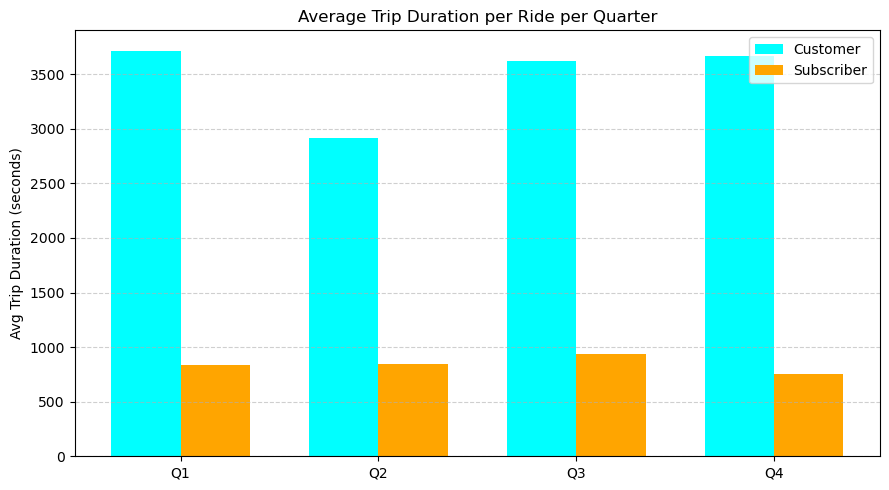

In [58]:
plot_avg_tripduration_by_quarter(df_combined,"Average Trip Duration per Ride per Quarter")

## - Function: Plot total trip duration by User Type by Quarter

In [59]:
import matplotlib.pyplot as plt

def plot_total_tripduration_by_quarter(df,title):
    df["start_time"] = pd.to_datetime(df["start_time"])
    df["quarter"] = df["start_time"].dt.quarter

    quarters = [1, 2, 3, 4]
    x = np.arange(len(quarters))
    width = 0.2

    customer_totals = []
    subscriber_totals = []

    for q in quarters:
        q_df = df[df["quarter"] == q]
        customer_totals.append(q_df[q_df["usertype"] == "Customer"]["tripduration"].sum())
        subscriber_totals.append(q_df[q_df["usertype"] == "Subscriber"]["tripduration"].sum())

    plt.bar(x - width/2, customer_totals, width, color='cyan', label='Customer')
    plt.bar(x + width/2, subscriber_totals, width, color='orange', label='Subscriber')

    plt.xticks(x, ['Q1', 'Q2', 'Q3', 'Q4'])
    plt.ylabel("Total Trip Duration (seconds)")
    if title is None:
        plt.title("Total Trip Duration by User Type per Quarter")
    else:
        plt.title(title)
    plt.legend()
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()


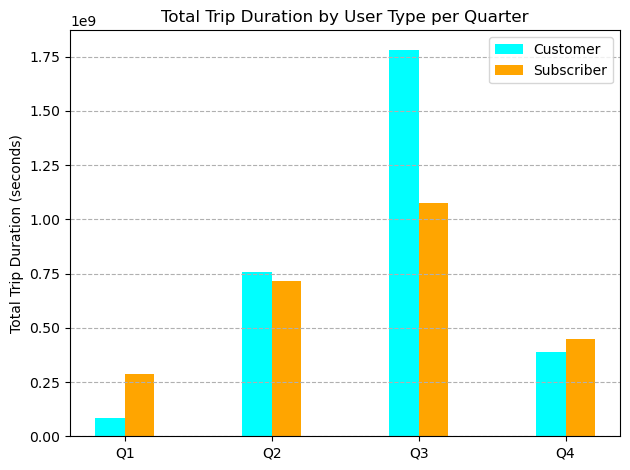

In [60]:
plot_total_tripduration_by_quarter(df_combined,"Total Trip Duration by User Type per Quarter")


In [61]:
import matplotlib.pyplot as plt

def plot_total_rides_by_quarter(df,title):
    df["start_time"] = pd.to_datetime(df["start_time"])
    df["quarter"] = df["start_time"].dt.quarter

    quarters = [1, 2, 3, 4]
    x = np.arange(len(quarters))
    width = 0.2

    customer_totals = []
    subscriber_totals = []

    for q in quarters:
        q_df = df[df["quarter"] == q]
        customer_totals.append(len(q_df[q_df["usertype"] == "Customer"]))
        subscriber_totals.append(len(q_df[q_df["usertype"] == "Subscriber"]))

    plt.bar(x - width/2, customer_totals, width, color='cyan', label='Customer')
    plt.bar(x + width/2, subscriber_totals, width, color='orange', label='Subscriber')

    plt.xticks(x, ['Q1', 'Q2', 'Q3', 'Q4'])
    plt.ylabel("Total Trip Duration (seconds)")
    if title is None:
        plt.title("Total rides by User Type by Quarter")
    else:
        plt.title(title)
    plt.legend()
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()


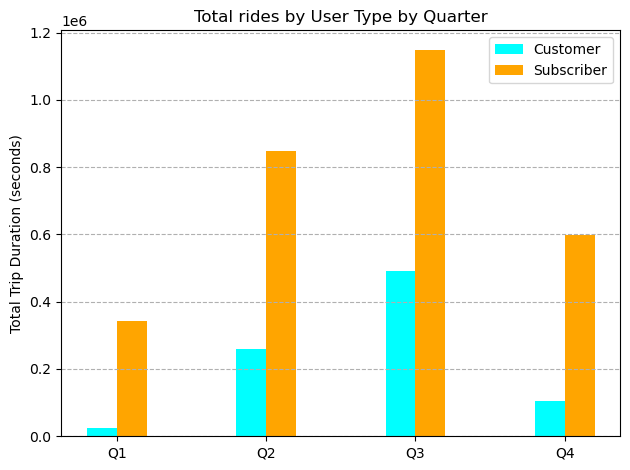

In [62]:
plot_total_rides_by_quarter(df_combined,"Total rides by User Type by Quarter")

## - Chicago temperature from 2019-01-01 to 2019-12-31

In [63]:
df_weather=pd.read_csv('chicago 2019-01-01 to 2019-12-31.csv')
df_weather.info

<bound method DataFrame.info of         name    datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0    chicago  2019-01-01      2.0     -2.9  -1.0          -2.1          -6.6   
1    chicago  2019-01-02     -0.5     -2.5  -1.5          -2.0          -8.3   
2    chicago  2019-01-03      4.2     -3.9   0.0           0.1          -9.6   
3    chicago  2019-01-04      9.7     -0.1   3.5           7.6          -4.6   
4    chicago  2019-01-05     11.7     -0.2   4.9          11.7          -3.6   
..       ...         ...      ...      ...   ...           ...           ...   
360  chicago  2019-12-27      3.9     -1.1   1.7           0.7          -3.5   
361  chicago  2019-12-28      9.3     -1.3   3.8           7.3          -3.0   
362  chicago  2019-12-29     14.3      9.3  12.5          14.3           7.0   
363  chicago  2019-12-30      8.9     -1.9   1.1           6.8          -9.5   
364  chicago  2019-12-31     -1.8     -3.5  -2.7          -6.9         -11.4   

     fe

In [65]:
df_weather.describe

<bound method NDFrame.describe of         name    datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0    chicago  2019-01-01      2.0     -2.9  -1.0          -2.1          -6.6   
1    chicago  2019-01-02     -0.5     -2.5  -1.5          -2.0          -8.3   
2    chicago  2019-01-03      4.2     -3.9   0.0           0.1          -9.6   
3    chicago  2019-01-04      9.7     -0.1   3.5           7.6          -4.6   
4    chicago  2019-01-05     11.7     -0.2   4.9          11.7          -3.6   
..       ...         ...      ...      ...   ...           ...           ...   
360  chicago  2019-12-27      3.9     -1.1   1.7           0.7          -3.5   
361  chicago  2019-12-28      9.3     -1.3   3.8           7.3          -3.0   
362  chicago  2019-12-29     14.3      9.3  12.5          14.3           7.0   
363  chicago  2019-12-30      8.9     -1.9   1.1           6.8          -9.5   
364  chicago  2019-12-31     -1.8     -3.5  -2.7          -6.9         -11.4   

     

In [66]:
df_weather.isnull().sum()

name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          182
snow                  0
snowdepth             0
windgust              0
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
severerisk          365
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
stations              0
dtype: int64

### - Extract the Temperature Feature

In [67]:
df_temp=df_weather[["datetime","temp"]]
df_temp.info

<bound method DataFrame.info of        datetime  temp
0    2019-01-01  -1.0
1    2019-01-02  -1.5
2    2019-01-03   0.0
3    2019-01-04   3.5
4    2019-01-05   4.9
..          ...   ...
360  2019-12-27   1.7
361  2019-12-28   3.8
362  2019-12-29  12.5
363  2019-12-30   1.1
364  2019-12-31  -2.7

[365 rows x 2 columns]>

### - Find correlation

In [68]:
df_combined['start_time'] = pd.to_datetime(df_combined['start_time'])
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])

daily_rides = df_combined.groupby(df_combined["start_time"].dt.date).size().reset_index(name='total_rides')
daily_rides['date'] = pd.to_datetime(daily_rides['start_time'])
daily_rides.drop('start_time', axis=1, inplace=True)

df_weather_daily = df_weather[['datetime', 'temp']].copy()
df_weather_daily.rename(columns={'datetime': 'date'}, inplace=True)

In [69]:
df_merge = pd.merge(daily_rides, df_weather_daily, on='date')

In [70]:
correlation = df_merge['total_rides'].corr(df_merge['temp'])
print(f"Correlation between daily rides and temperature: {correlation:.3f}")


Correlation between daily rides and temperature: 0.880


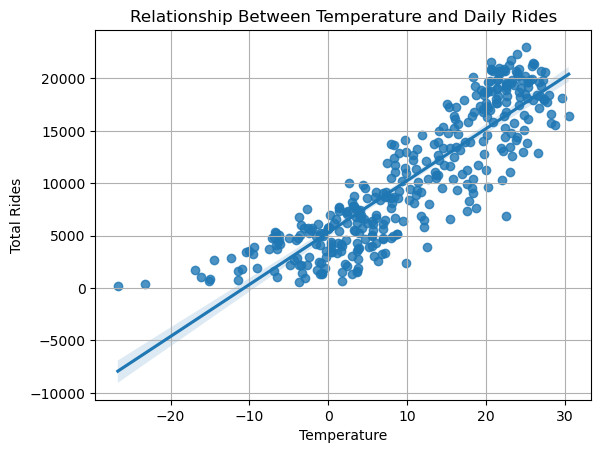

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='temp', y='total_rides', data=df_merge)
plt.title("Relationship Between Temperature and Daily Rides")
plt.xlabel("Temperature")
plt.ylabel("Total Rides")
plt.grid(True)
plt.show()


In [72]:
import statsmodels.api as sm

X = df_merge['temp']
y = df_merge['total_rides']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            total_rides   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     1251.
Date:                Wed, 23 Jul 2025   Prob (F-statistic):          1.17e-119
Time:                        03:53:46   Log-Likelihood:                -3440.6
No. Observations:                 365   AIC:                             6885.
Df Residuals:                     363   BIC:                             6893.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5294.9054    214.865     24.643      0.0

## - Function: Plot total rides by User Type by Weekday

In [73]:
import matplotlib.pyplot as plt

def plot_total_rides_by_weekday(df, title=None):
    df=df.copy()
    df["start_time"] = pd.to_datetime(df["start_time"])
    df["weekday"] = df["start_time"].dt.day_name()

    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    x = np.arange(len(weekdays))
    width = 0.2

    customer_totals = []
    subscriber_totals = []

    for day in weekdays:
        day_df = df[df["weekday"] == day]
        customer_totals.append(len(day_df[day_df["usertype"] == "Customer"]))
        subscriber_totals.append(len(day_df[day_df["usertype"] == "Subscriber"]))

    plt.bar(x - width/2, customer_totals, width, color='cyan', label='Customer')
    plt.bar(x + width/2, subscriber_totals, width, color='orange', label='Subscriber')

    plt.xticks(x, weekdays, rotation=45)
    plt.ylabel("Total Rides")
    if title is None:
        plt.title("Total Rides by User Type by Weekday")
    else:
        plt.title(title)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


C:\Users\minhk\AppData\Local\Temp\ipykernel_8644\2578941692.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1=df_2019_Q1[df_combined["from_station_name"]==station_name]


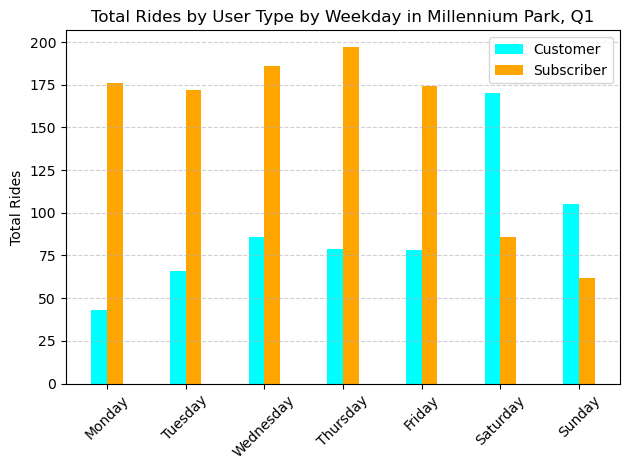

C:\Users\minhk\AppData\Local\Temp\ipykernel_8644\2578941692.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1=df_2019_Q2[df_combined["from_station_name"]==station_name]


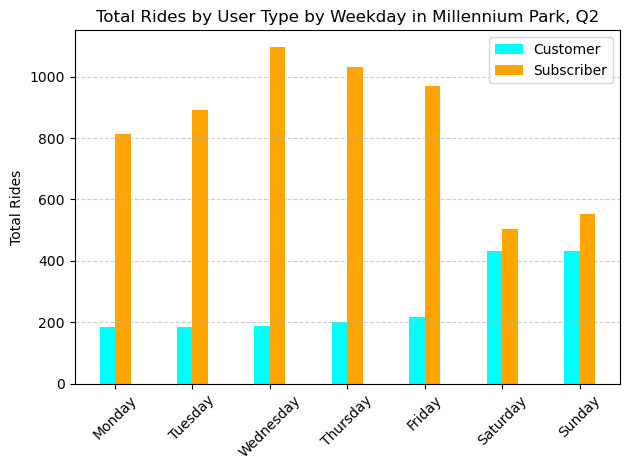

C:\Users\minhk\AppData\Local\Temp\ipykernel_8644\2578941692.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1=df_2019_Q3[df_combined["from_station_name"]==station_name]


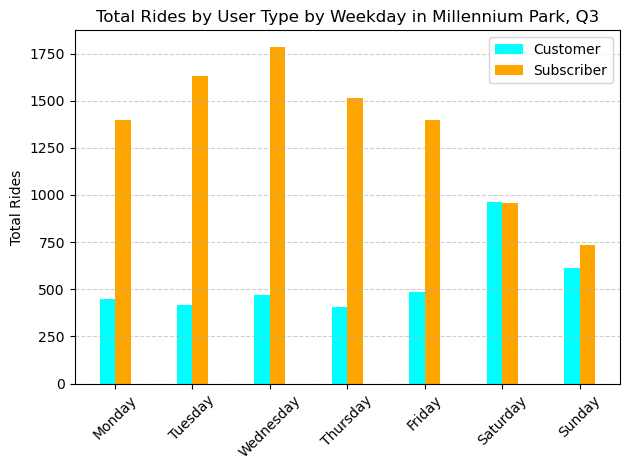

C:\Users\minhk\AppData\Local\Temp\ipykernel_8644\2578941692.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1=df_2019_Q4[df_combined["from_station_name"]==station_name]


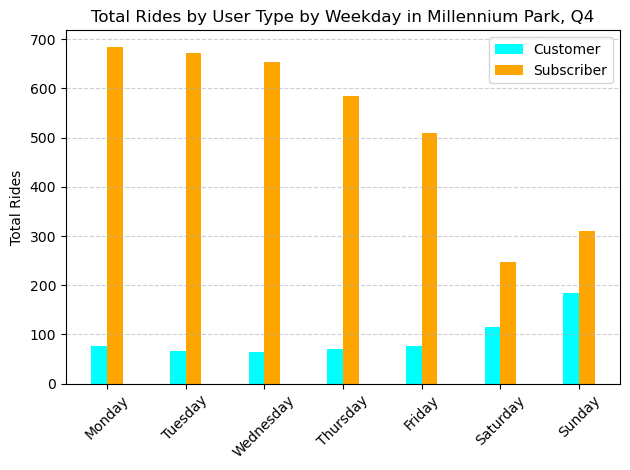

In [74]:
station_name="Millennium Park"
df_1=df_2019_Q1[df_combined["from_station_name"]==station_name]
plot_total_rides_by_weekday(df_1,"Total Rides by User Type by Weekday in Millennium Park, Q1")

df_1=df_2019_Q2[df_combined["from_station_name"]==station_name]
plot_total_rides_by_weekday(df_1,"Total Rides by User Type by Weekday in Millennium Park, Q2")

df_1=df_2019_Q3[df_combined["from_station_name"]==station_name]
plot_total_rides_by_weekday(df_1,"Total Rides by User Type by Weekday in Millennium Park, Q3")

df_1=df_2019_Q4[df_combined["from_station_name"]==station_name]
plot_total_rides_by_weekday(df_1,"Total Rides by User Type by Weekday in Millennium Park, Q4")


C:\Users\minhk\AppData\Local\Temp\ipykernel_8644\3722136375.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1=df_2019_Q1[df_combined["from_station_name"]==station_name]


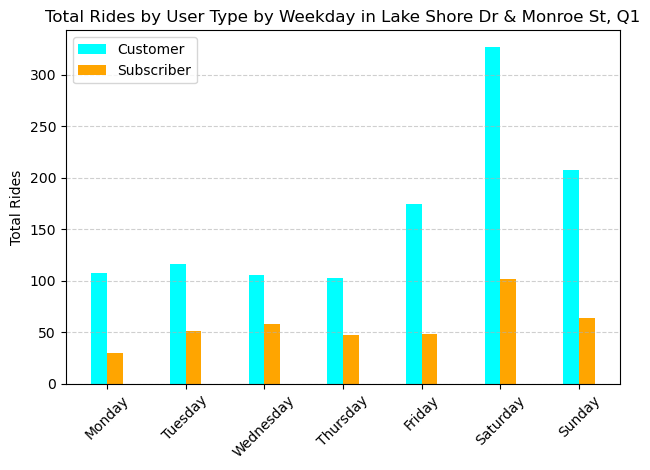

C:\Users\minhk\AppData\Local\Temp\ipykernel_8644\3722136375.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1=df_2019_Q2[df_combined["from_station_name"]==station_name]


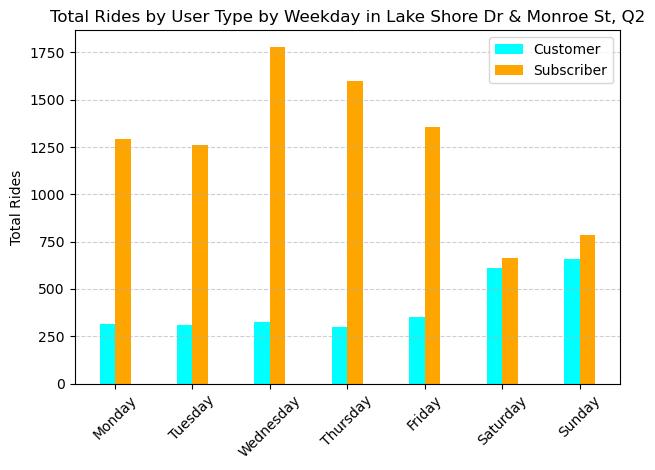

C:\Users\minhk\AppData\Local\Temp\ipykernel_8644\3722136375.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1=df_2019_Q3[df_combined["from_station_name"]==station_name]


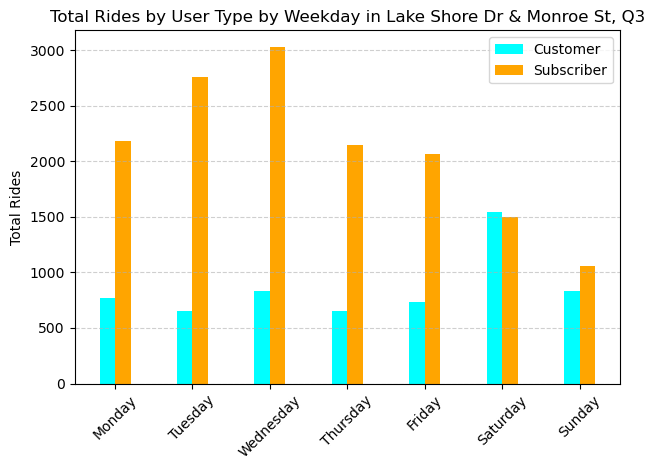

C:\Users\minhk\AppData\Local\Temp\ipykernel_8644\3722136375.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1=df_2019_Q4[df_combined["from_station_name"]==station_name]


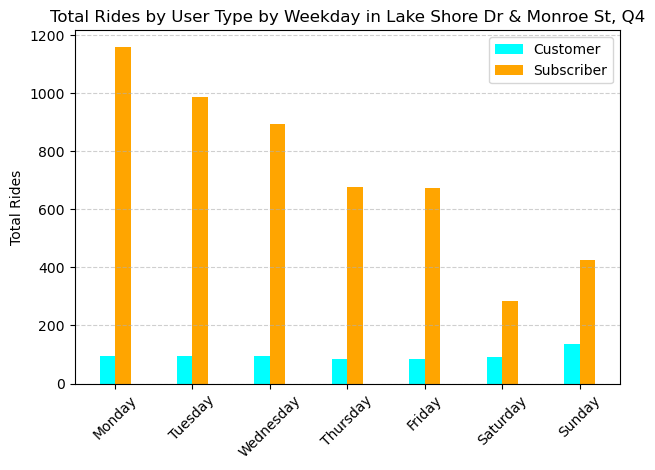

In [75]:
station_name="Lake Shore Dr & Monroe St"
df_1=df_2019_Q1[df_combined["from_station_name"]==station_name]
plot_total_rides_by_weekday(df_1,"Total Rides by User Type by Weekday in Lake Shore Dr & Monroe St, Q1")

df_1=df_2019_Q2[df_combined["from_station_name"]==station_name]
plot_total_rides_by_weekday(df_1,"Total Rides by User Type by Weekday in Lake Shore Dr & Monroe St, Q2")

df_1=df_2019_Q3[df_combined["from_station_name"]==station_name]
plot_total_rides_by_weekday(df_1,"Total Rides by User Type by Weekday in Lake Shore Dr & Monroe St, Q3")

df_1=df_2019_Q4[df_combined["from_station_name"]==station_name]
plot_total_rides_by_weekday(df_1,"Total Rides by User Type by Weekday in Lake Shore Dr & Monroe St, Q4")


C:\Users\minhk\AppData\Local\Temp\ipykernel_8644\310245602.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1=df_2019_Q1[df_combined["from_station_name"]==station_name]


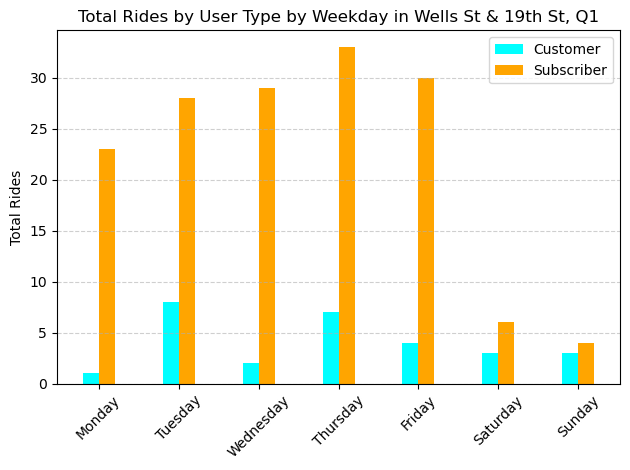

C:\Users\minhk\AppData\Local\Temp\ipykernel_8644\310245602.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1=df_2019_Q2[df_combined["from_station_name"]==station_name]


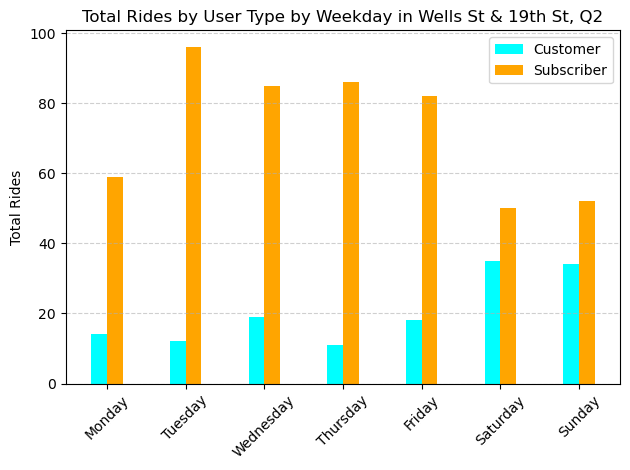

C:\Users\minhk\AppData\Local\Temp\ipykernel_8644\310245602.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1=df_2019_Q3[df_combined["from_station_name"]==station_name]


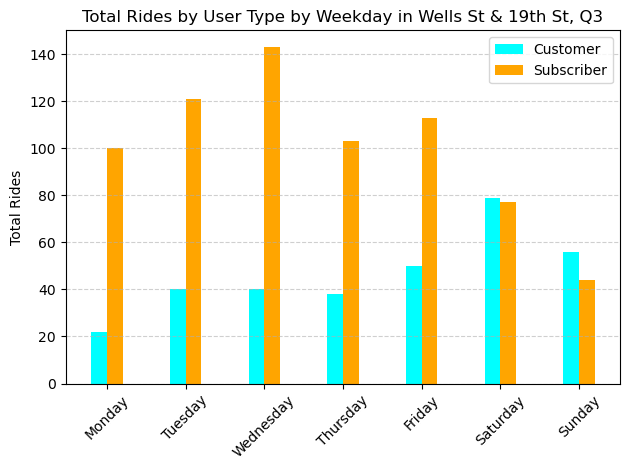

C:\Users\minhk\AppData\Local\Temp\ipykernel_8644\310245602.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1=df_2019_Q4[df_combined["from_station_name"]==station_name]


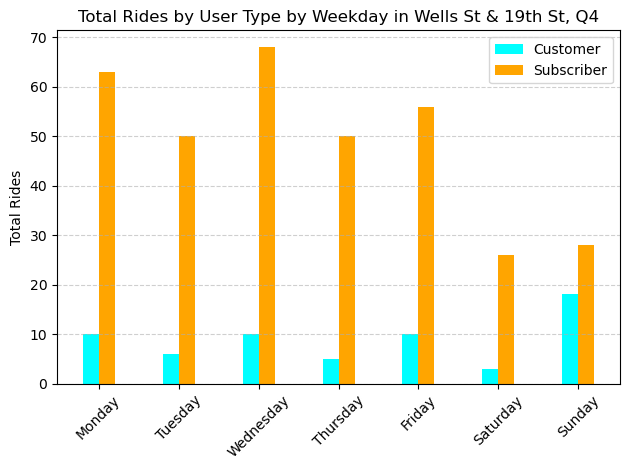

In [76]:
station_name="Wells St & 19th St"
df_1=df_2019_Q1[df_combined["from_station_name"]==station_name]
plot_total_rides_by_weekday(df_1,"Total Rides by User Type by Weekday in Wells St & 19th St, Q1")

df_1=df_2019_Q2[df_combined["from_station_name"]==station_name]
plot_total_rides_by_weekday(df_1,"Total Rides by User Type by Weekday in Wells St & 19th St, Q2")

df_1=df_2019_Q3[df_combined["from_station_name"]==station_name]
plot_total_rides_by_weekday(df_1,"Total Rides by User Type by Weekday in Wells St & 19th St, Q3")

df_1=df_2019_Q4[df_combined["from_station_name"]==station_name]
plot_total_rides_by_weekday(df_1,"Total Rides by User Type by Weekday in Wells St & 19th St, Q4")


C:\Users\minhk\AppData\Local\Temp\ipykernel_8644\1857276514.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1=df_2019_Q1[df_combined["from_station_name"]==station_name]


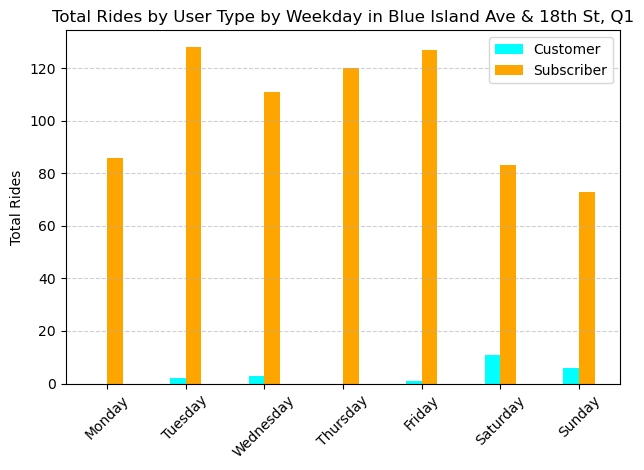

C:\Users\minhk\AppData\Local\Temp\ipykernel_8644\1857276514.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1=df_2019_Q2[df_combined["from_station_name"]==station_name]


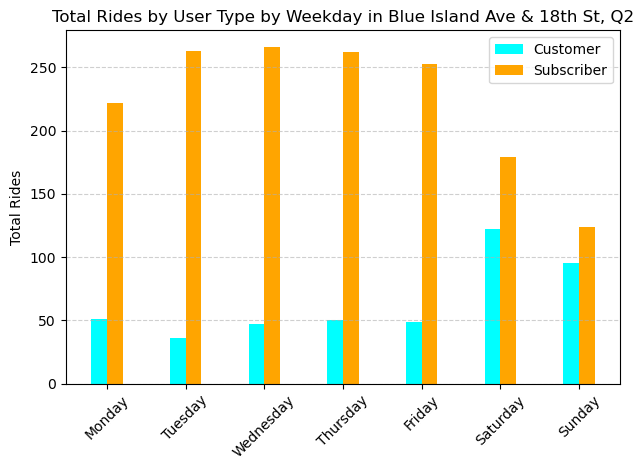

C:\Users\minhk\AppData\Local\Temp\ipykernel_8644\1857276514.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1=df_2019_Q3[df_combined["from_station_name"]==station_name]


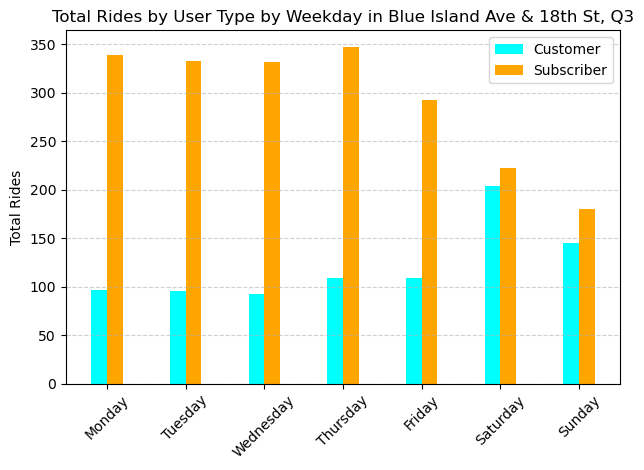

C:\Users\minhk\AppData\Local\Temp\ipykernel_8644\1857276514.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1=df_2019_Q4[df_combined["from_station_name"]==station_name]


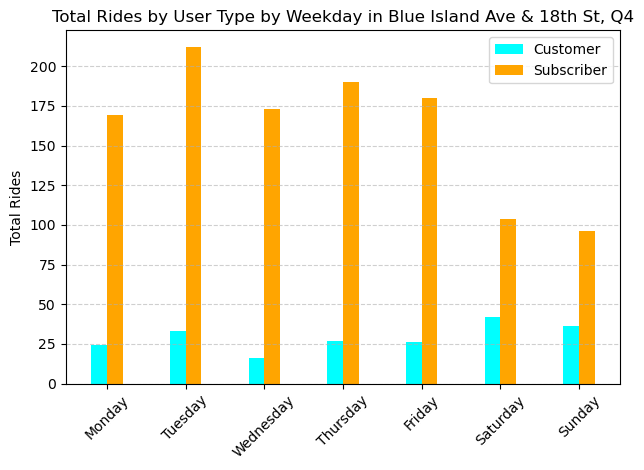

In [100]:
station_name="Blue Island Ave & 18th St"
df_1=df_2019_Q1[df_combined["from_station_name"]==station_name]
plot_total_rides_by_weekday(df_1,"Total Rides by User Type by Weekday in Blue Island Ave & 18th St, Q1")

df_1=df_2019_Q2[df_combined["from_station_name"]==station_name]
plot_total_rides_by_weekday(df_1,"Total Rides by User Type by Weekday in Blue Island Ave & 18th St, Q2")

df_1=df_2019_Q3[df_combined["from_station_name"]==station_name]
plot_total_rides_by_weekday(df_1,"Total Rides by User Type by Weekday in Blue Island Ave & 18th St, Q3")

df_1=df_2019_Q4[df_combined["from_station_name"]==station_name]
plot_total_rides_by_weekday(df_1,"Total Rides by User Type by Weekday in Blue Island Ave & 18th St, Q4")


## - Plot Gender Percentage by User Type

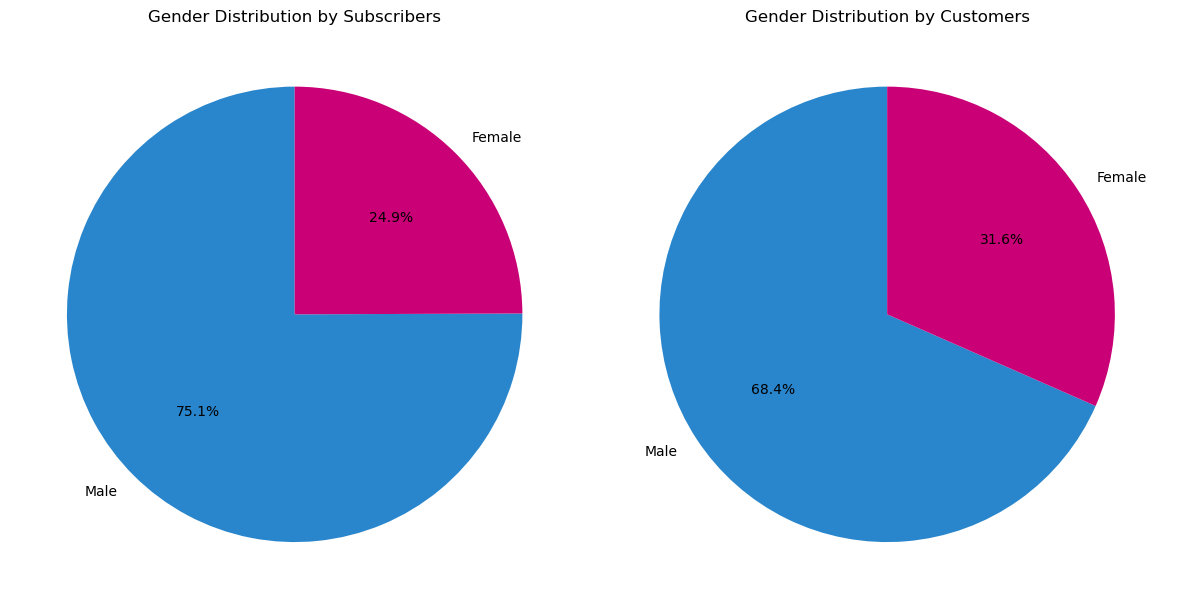

In [105]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Data for Subscribers
counts_subscriber = [
    df_combined.loc[(df_combined["usertype"] == "Subscriber") & (df_combined["gender"] == "Male")].shape[0], 
    df_combined.loc[(df_combined["usertype"] == "Subscriber") & (df_combined["gender"] == "Female")].shape[0]
]

# Data for Customers
counts_customer = [
    df_combined.loc[(df_combined["usertype"] == "Customer") & (df_combined["gender"] == "Male")].shape[0], 
    df_combined.loc[(df_combined["usertype"] == "Customer") & (df_combined["gender"] == "Female")].shape[0]
]

# Pie chart for Subscribers
axes[0].pie(counts_subscriber, labels=["Male", "Female"], autopct='%1.1f%%', 
            startangle=90, colors=['#2986cc', '#c90076'])
axes[0].set_title("Gender Distribution by Subscribers")

# Pie chart for Customers
axes[1].pie(counts_customer, labels=["Male", "Female"], autopct='%1.1f%%', 
            startangle=90, colors=['#2986cc', '#c90076'])
axes[1].set_title("Gender Distribution by Customers")

plt.tight_layout()
plt.show()


## - Plot Age Group Percentage by User Type

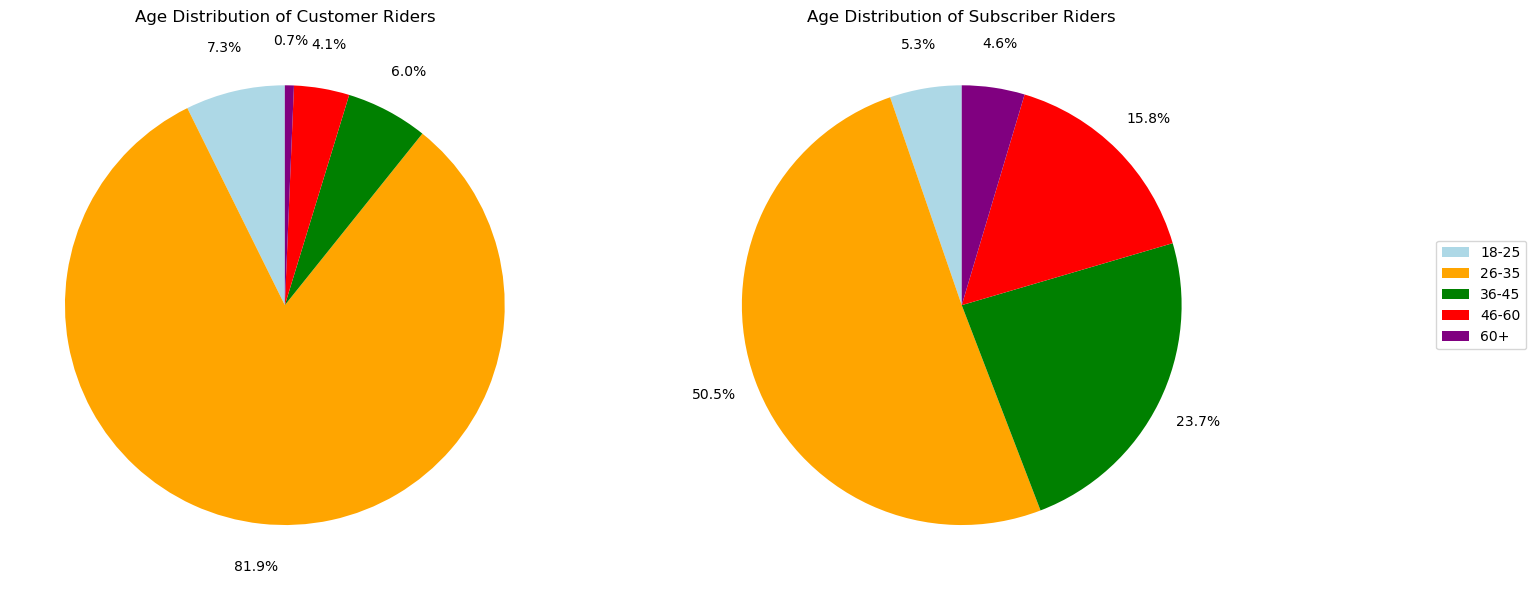

In [102]:
import matplotlib.pyplot as plt

# Ensure correct filtering and value counting
age_counts_customer = df_combined.loc[df_combined["usertype"] == "Customer", "age_group"].value_counts().reindex(labels)
age_counts_subscriber = df_combined.loc[df_combined["usertype"] == "Subscriber", "age_group"].value_counts().reindex(labels)

# Create subplots
fig, axis = plt.subplots(1, 2, figsize=(14, 6))

# Plot pie chart for Customers
axis[0].pie(age_counts_customer, autopct='%1.1f%%', startangle=90, 
            colors=['lightblue', 'orange', 'green', 'red', 'purple'],
            pctdistance=1.2, textprops={'fontsize': 10})
axis[0].set_title("Age Distribution of Customer Riders")

# Plot pie chart for Subscribers
axis[1].pie(age_counts_subscriber, autopct='%1.1f%%', startangle=90, 
            colors=['lightblue', 'orange', 'green', 'red', 'purple'],
            pctdistance=1.2, textprops={'fontsize': 10})
axis[1].set_title("Age Distribution of Subscriber Riders")

# Add a legend for both charts
fig.legend(labels=age_counts_customer.index, loc='center right', bbox_to_anchor=(1.15, 0.5))

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

In [94]:
# Export to csv for further visualization

df_2019_Q1.to_csv("divvy_trips_2019_Q1",index=False)
df_2019_Q2.to_csv("divvy_trips_2019_Q2",index=False)
df_2019_Q3.to_csv("divvy_trips_2019_Q3",index=False)
df_2019_Q4.to_csv("divvy_trips_2019_Q4",index=False)
df_combined.to_csv("divvy_trips_2019_2020",index=False)
df_temp.to_csv("temperature.csv",index=False)